# Object-oriented Plotting

In the previous section of the tutorial we covered Matlab-style plotting with the
``pylab`` interface.  Here we will cover a slightly more complicated interface
offered by matplotlb, which will be much more powerful in the long-run.  This
object-oriented approach is the recommended API in most data visualization
scenarios.

As part of this discussion, we will discuss generating multi-panel plots using
the ``subplot`` and ``subplots`` commands

As before, we'll start by entering pylab inline mode:

In [1]:
%matplotlib inline

## Behind the scenes: Figure and Axes

When we called ``pylab.plot`` previously, there were a few things happening in the background:

- matplotlib created a ``Figure`` instance, which is an object describing the plot window and
  its properties, and containing lists of all its elements
- matplotlib created an ``Axes`` element within the figure.  An axes can be thought of as a
  plotting window, where data can be arranged by ``x`` and ``y`` coordinates.

We're going to repeat some of the previous examples now, except we will specify these ``Figure``
and ``Axes`` instances explicitly:

First we need to import the ``pyplot`` interface.  The conventional way to do this is as follows:

In [2]:
import matplotlib.pyplot as plt

Now we will create our figure and axes:

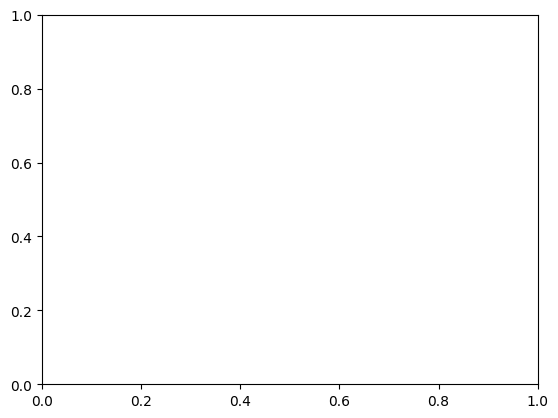

In [3]:
fig = plt.figure()  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)

As we can see, this creates a blank axes.  Now we can call ``plot`` as we
did before, except now we use the ``plot`` method of ``ax``:

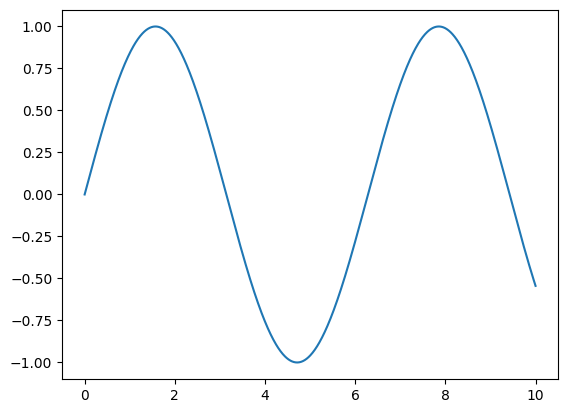

In [4]:
import numpy as np
x = np.linspace(0, 10, 1000)
y = np.sin(x)

ax.plot(x, y)
display(fig)  # this is required to re-display the figure

We can already see one advantage to the new interface: the figure remains open between
IPython commands!  There are ways to make this happen using the ``pylab`` interface we
saw previously, but they're much less clean.

Let's see this explicitly by now over-plotting a cosine:

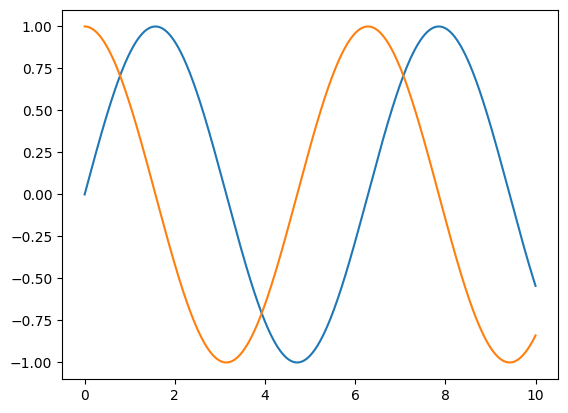

In [5]:
y2 = np.cos(x)
ax.plot(x, y2)

fig  # this works similarly to display(fig)

We can set the axes limits using ``ax.set_xlim`` rather than ``pylab.xlim``:

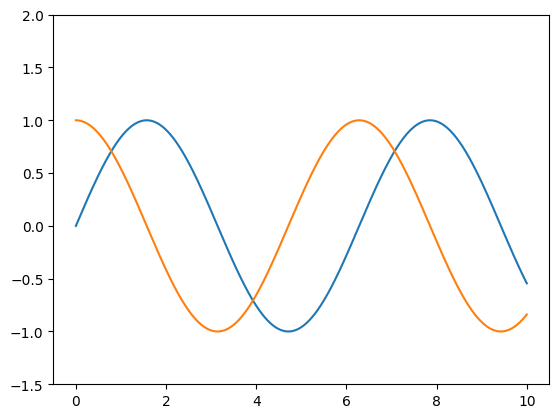

In [6]:
ax.set_ylim(-1.5, 2.0)
fig

And, as before, we can add a legend:

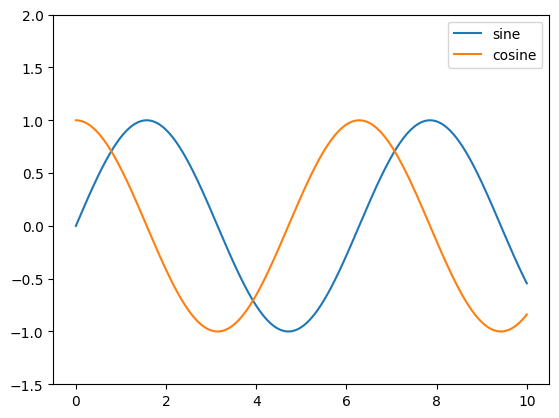

In [7]:
ax.legend(['sine', 'cosine'])
fig

Note that in this case, we didn't label the lines when we first drew them, but instead
called ``legend()`` with a list of labels.

We can similarly annotate the plot using the ``set_*`` methods

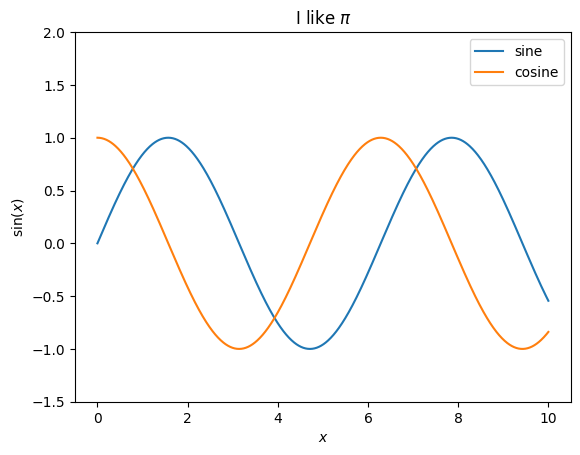

In [8]:
ax.set_xlabel("$x$")
ax.set_ylabel("$\sin(x)$")
ax.set_title("I like $\pi$")

fig

## Multi-panel Figures: Subplots

Above we snuck over a new command: ``fig.add_subplot``.  This command allows us to
create a grid of plot panels that can show any sort of plot.  The interface is

      fig.add_subplot(rows, cols, num)

In this case the ``rows`` tells how many rows are in the grid, the ``cols`` tells
how many columns are in the grid, and the ``num`` tells the number of the subplot
to create: counting from left to right, top to bottom and indexed starting at 1.
(The 1-based counting is an unfortunate hold-over from the command's matlab roots).

For example:

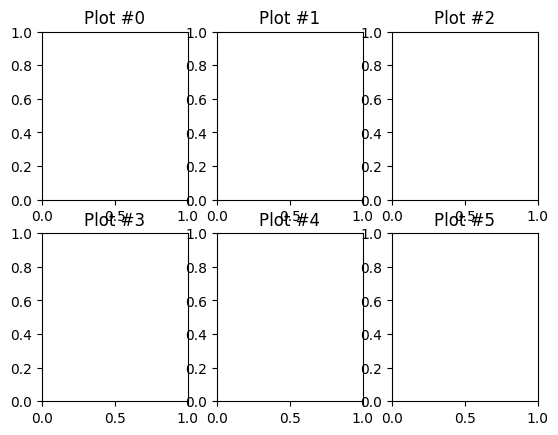

In [9]:
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_title("Plot #%i" % i)

We immediately see a problem: our labels are overlapping.  There are a few ways
to deal with this, but one is to use the ``subplots_adjust`` command.  We'll
adjust the width between each plot (``wspace``), and the height between each
plot (``hspace``) as a fraction of the size of each plot:

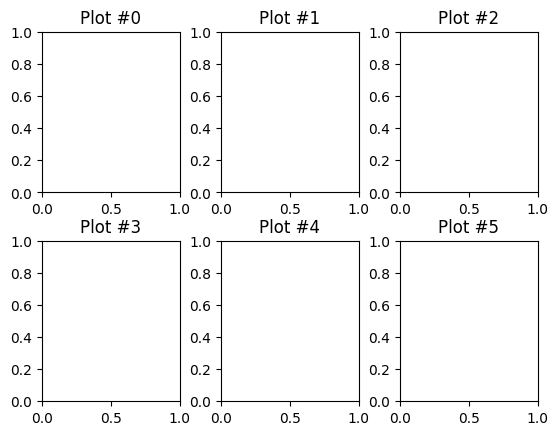

In [10]:
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig

We can now plot anything we desire in the plots.  For example:

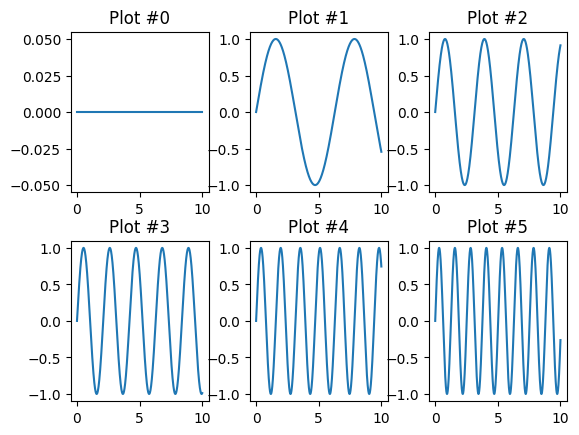

In [11]:
x = np.linspace(0, 10, 1000)
for i in range(6):
    fig.axes[i].plot(x, np.sin(i * x))
    
fig

## Easy Pythonic Subplotting: plt.subplots()

Matplotlib 1.0 (June 2010) added an even nicer subplot interface,
``plt.subplots``.  It automates the creation of the figure and
subplots.

First we'll create just a single figure and axes:

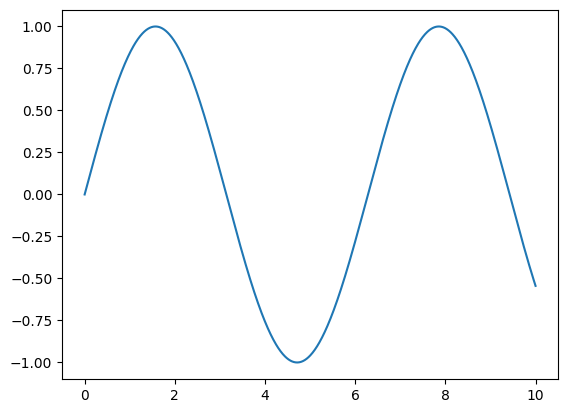

In [12]:
# create just a single figure and axes
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

We can also create multiple subplots and plot the same data as above:

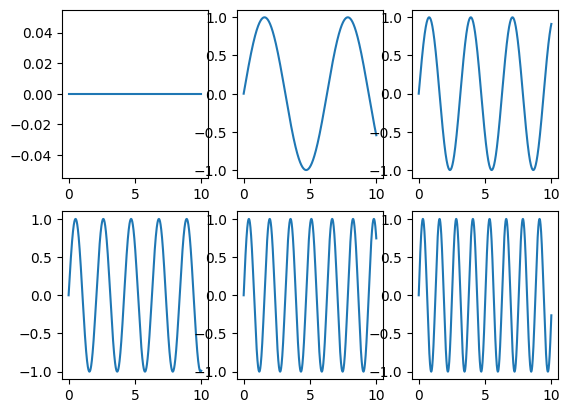

In [13]:
fig, ax = plt.subplots(2, 3)  # 2x3 grid

for i in range(2):
    for j in range(3):
        ax[i, j].plot(x, np.sin((3 * i + j) * x))

In this case, we know that all the plots have the same ``x`` range and the
same ``y`` range, and it would be nice if we could take away all the
unnecessary labels.  This can be done by specifying ``sharex`` or ``sharey``:

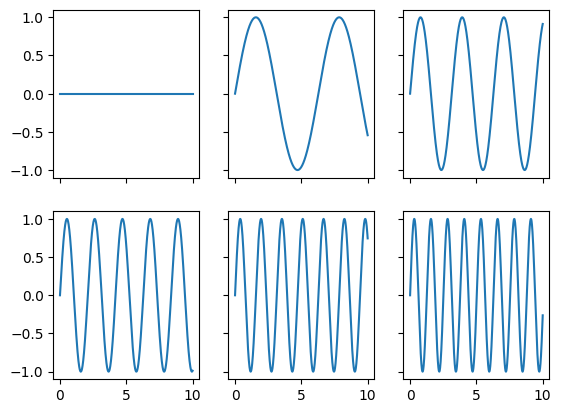

In [14]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)  # 2x3 grid

for i in range(2):
    for j in range(3):
        ax[i, j].plot(x, np.sin((3 * i + j) * x))

## More Complicated Gridding: GridSpec

Sometimes more complicated gridding and subplotting is desired.  Matplotlib 1.0 also
added the ``gridspec`` module, which offers a lot of flexibility in creating
multiple axes.  For example:

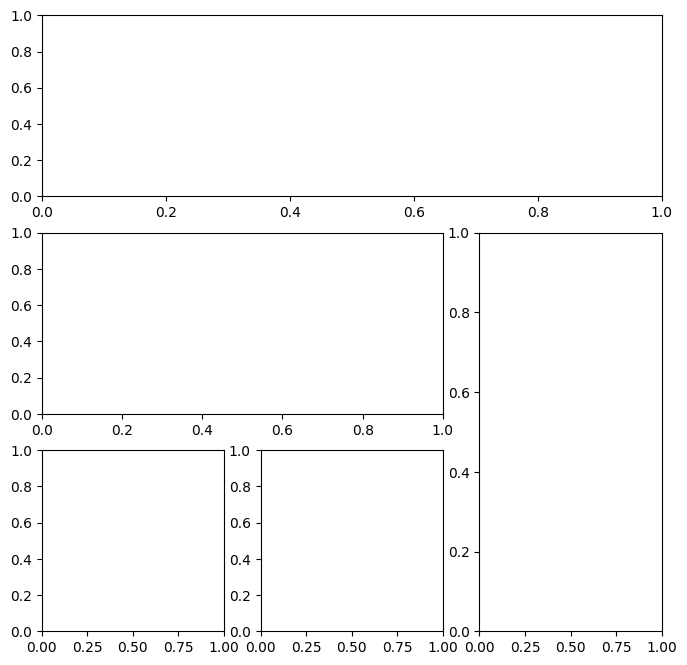

In [15]:
fig = plt.figure(figsize=(8, 8))
gs = plt.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])